# Pymaceuticals Inc.
---

### Analysis

- The drug, Capomulin, was tested on the most number of mice (230). 
- In the male vs female comparison pie chart, it shows there are a fairly equal numbers of both in the study, with 50.2% being male and 49.8% being female.
- The box plot shows Capomulin and Ramicane treatments had lower final tumor volumes than treatments Ifubinol and Ceftamin.
- In the treatment data for one selected mouse (l509), treated with Capomulin, there is a decline of tumor volume over number of days in the study.
- For Capomulin the correlation between mouse weight and the average tumor volume is 0.84 and ther regression analysis shows a positiive slope in which as the weight increases also does average tumor volume. 


 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
joined_data = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'outer')

# Display the data table for preview
joined_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [49]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].nunique()

249

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicates = joined_data.loc[joined_data.duplicated(['Mouse ID', 'Timepoint'])]
Duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [51]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_MouseID_Data = joined_data[joined_data.duplicated(['Mouse ID', 'Timepoint'])]
Duplicate_MouseID_Data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
joined_data_clean = joined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
joined_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [53]:
# Checking the number of mice in the clean DataFrame.
joined_data_clean['Mouse ID'].nunique()

249

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Drug_Regimen_mean = joined_data_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Drug_Regimen_mean

Drug_Regimen_median = joined_data_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Drug_Regimen_median

Drug_Regimen_variance = joined_data_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Drug_Regimen_variance

Drug_Regimen_stdev = joined_data_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
Drug_Regimen_stdev

Drug_Regimen_sem = joined_data_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
Drug_Regimen_sem


# Assemble the resulting series into a single summary DataFrame.
stats_table = pd.DataFrame({"Mean Tumor Volume": Drug_Regimen_mean,
                          "Median Tumor Volume": Drug_Regimen_median,
                          "Tumor Volume Variance": Drug_Regimen_variance, 
                          "Tumor Volume Std. Dev.": Drug_Regimen_stdev, 
                          "Tumor Volume Std. Err.": Drug_Regimen_sem})
stats_table


/var/folders/58/l2xhf5w97cxgl7_mqf1_7hwh0000gn/T/ipykernel_29270/3592762632.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Drug_Regimen_mean = joined_data_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
/var/folders/58/l2xhf5w97cxgl7_mqf1_7hwh0000gn/T/ipykernel_29270/3592762632.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Drug_Regimen_median = joined_data_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
/var/folders/58/l2xhf5w97cxgl7_mqf1_7hwh0000gn/T/ipykernel_29270/3592762632.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

stats_table2 = joined_data_clean.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

stats_table2







/var/folders/58/l2xhf5w97cxgl7_mqf1_7hwh0000gn/T/ipykernel_29270/2830942218.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_table2 = joined_data_clean.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

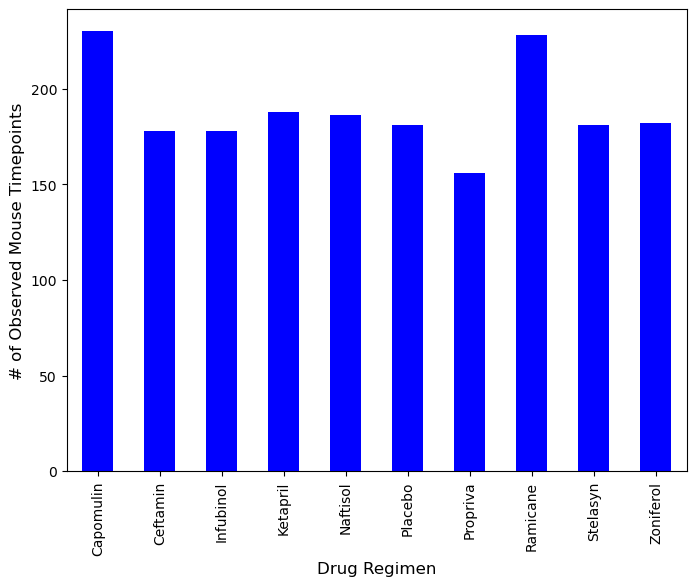

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_numbers = joined_data_clean.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_bar = regimen_numbers.plot(kind="bar", color='b', figsize=(8,6), fontsize = 10)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("# of Observed Mouse Timepoints", fontsize = 12)

plt.show

In [71]:
regimen_numbers = joined_data_clean.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_numbers

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

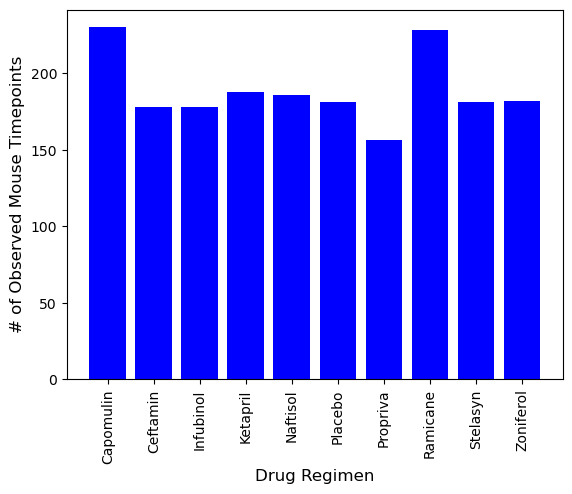

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np
regimen_count = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

x_axis = np.arange(len(regimen_numbers))
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, regimen_numbers.index.values, rotation="vertical")
plt.bar(x_axis, regimen_count, color="b", align="center")
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("# of Observed Mouse Timepoints", size = 12)


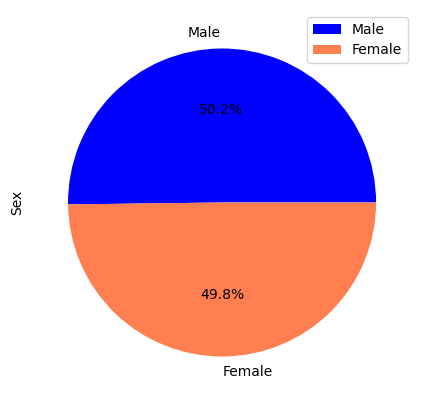

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = joined_data_clean.loc[:, ["Sex", "Mouse ID"]]
gender_data = gender_data.drop_duplicates()
gender_data_count = gender_data["Sex"].value_counts()
gender_data_count

#Dataframe for male and female
gender_df = pd.DataFrame({"Sex": gender_data_count})

#Generating pie plot
colors = ["blue", "coral"]

pandas_pie = gender_df.plot(kind="pie", figsize=(5,5), colors=colors, y="Sex", startangle=360, autopct="%1.1f%%")
plt.show()

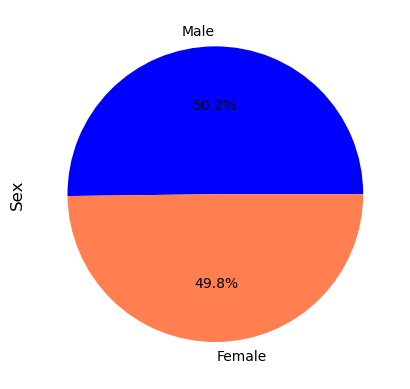

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = joined_data_clean.loc[:, ["Sex", "Mouse ID"]]
gender_data = gender_data.drop_duplicates()
gender_data_count = gender_data["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "coral"]
plt.ylabel("Sex", fontsize = 12)
plt.pie(gender_data_count, labels=labels, colors=colors, startangle=360, autopct="%1.1f%%")


plt.show()

## Quartiles, Outliers and Boxplots

In [96]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = joined_data_clean.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_vol = max_timepoint.merge(joined_data_clean, on=["Mouse ID", "Timepoint"], how="left")
merged_data_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [97]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data_vol.loc[merged_data_vol["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile ([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


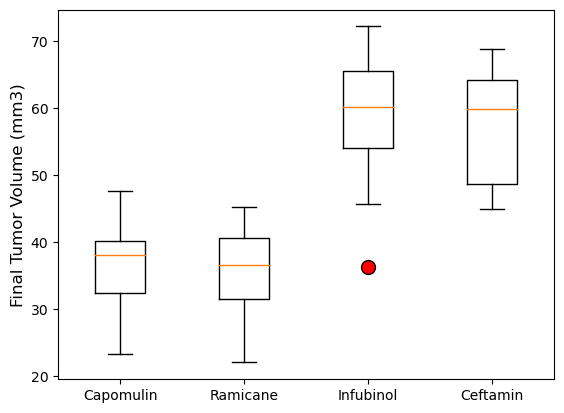

In [112]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)', fontsize = 12)
ax1.boxplot(tumor_vol_data, labels=treatments, widths = 0.4, flierprops={'markersize': 10, 'markerfacecolor':'red'})

plt.show()

## Line and Scatter Plots

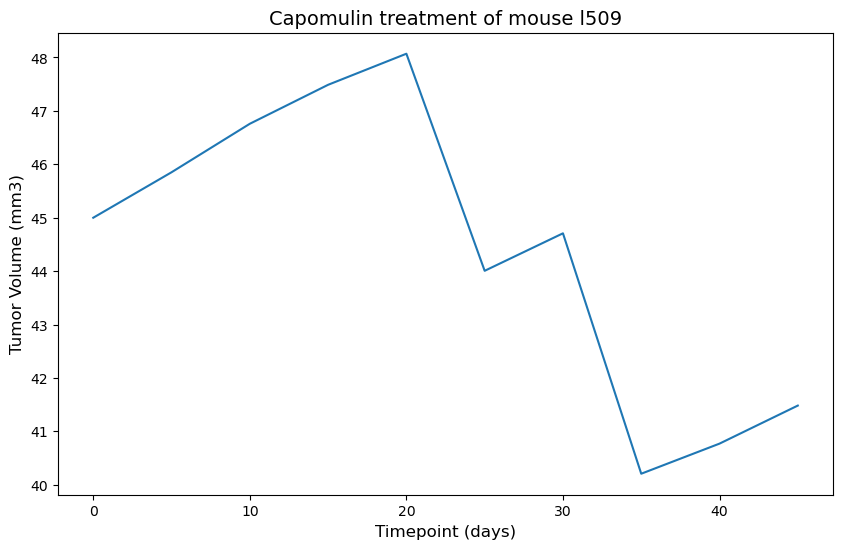

In [122]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = joined_data_clean.loc[joined_data_clean["Drug Regimen"] == "Capomulin",:]
capomulin_df

mouse_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
mouse_capomulin

x_axis = mouse_capomulin["Timepoint"]
tumor_vol = mouse_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10,6))
plt.title("Capomulin treatment of mouse l509", fontsize = 14)
plt.plot(x_axis, tumor_vol)
plt.xlabel("Timepoint (days)", fontsize = 12)
plt.ylabel("Tumor Volume (mm3)", fontsize = 12)
plt.show()

/var/folders/58/l2xhf5w97cxgl7_mqf1_7hwh0000gn/T/ipykernel_29270/1422984972.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capomulin = capomulin_df.groupby(['Mouse ID']).mean()


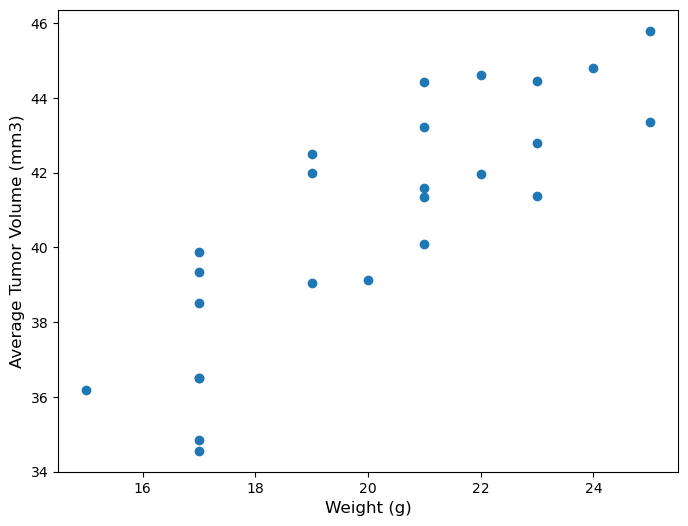

In [124]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_capomulin = capomulin_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize= (8,6))
plt.scatter(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)", fontsize = 12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize = 12)

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
y = 0.95x + 21.55


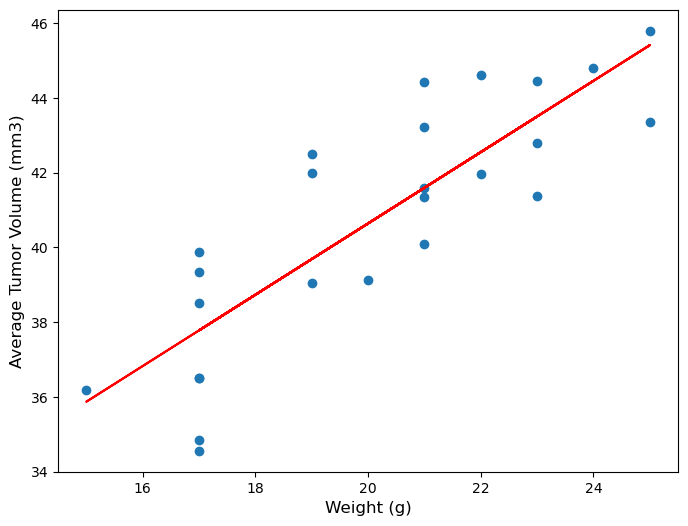

In [128]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

from scipy.stats import linregress
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)", fontsize =12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)

plt.show()